## User net

In [2]:
import networkx as nx
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from networkx.algorithms.approximation import diameter

with open("data/cleaned/sub", 'rb') as f:
    sub = pickle.load(f)
with open("data/cleaned/comm", 'rb') as f:
    comm = pickle.load(f)


In [3]:
sub = sub[['author' , 'id']]
comm = comm[['id' , 'author' , 'parent_id']]
list_sub = set(sub['author'].unique())
list_comm = set(comm['author'].unique())


users = list_sub.union(list_comm)
print("Broj nodova je: ", len(users))

G = nx.DiGraph() # pravi praznu mrežu
G.add_nodes_from(users) # dodaje čvorove čije su labele u "set_of_subreddits"

Broj nodova je:  226641


In [4]:
sub = sub.rename(columns = {'id' : 'sub_id'})
sub_m = sub.merge(comm, left_on='sub_id' , right_on = 'parent_id')

for _, u_to, _, _, u_from,_ in sub_m.itertuples():
    if u_to==u_from:
        continue
    if (u_from, u_to) in G.edges:
        G.edges[u_from, u_to]['weight'] +=1
    else:
        G.add_edge(u_from, u_to, weight = 1)
sub_m
    

,author_x,sub_id,id,author_y,parent_id
0,rmuser,648op,c02sadg,fotoman,648op
1,rmuser,648op,c02scke,quiller,648op
2,rmuser,648op,c02scpa,sexydarin,648op
3,rmuser,648op,c02sgcn,Gargilius,648op
4,zorno,648or,c02s9ww,reflibman,648or
...,...,...,...,...,...
1476890,Scarker,7mq1r,7v65,russianout,7mq1r
1476891,stumo,7mq1x,7v8w,stumo,7mq1x
1476892,stumo,7mq1x,7v9m,eMigo,7mq1x
1476893,catlebrity,7mq2q,7v61,catlebrity,7mq2q


In [5]:
comm_m = comm.merge(comm, left_on = 'id' , right_on='parent_id')
for _, _, u_to, _, _, u_from ,_ in comm_m.itertuples():
    if u_to==u_from:
        continue
    if (u_from, u_to) in G.edges:
        G.edges[u_from, u_to]['weight'] +=1
    else:
        G.add_edge(u_from, u_to, weight = 1)
comm_m
G.remove_nodes_from(list(nx.isolates(G)))

In [6]:
print(nx.info(G))

DiGraph with 80714 nodes and 2803295 edges


C:\Users\Nikola\AppData\Local\Temp\ipykernel_18008\2606185536.py:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G))


In [8]:
from networkx.algorithms.approximation import diameter
nx.write_gml(G, 'graphs/userNet.gml')
connected_componnets = sorted(nx.strongly_connected_components(G), key=len, reverse=True)
giant = G.subgraph(connected_componnets[0]).copy()
nx.info(giant)
nx.write_gml(giant, 'graphs/userNet_giant.gml')

C:\Users\Nikola\AppData\Local\Temp\ipykernel_18008\1595146042.py:5: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  nx.info(giant)


# Odgovori Na Pitanja

### 7 - Gustina Mreze


In [7]:
print(nx.density(giant))

0.0011472326816241293


### 8 - Dijametar iznosi:  

In [8]:
print(diameter(giant))

13


### 9 - Povezane komponente

In [9]:
print("Broj povezanih kompnenti: " , nx.number_strongly_connected_components(G))

Broj povezanih kompnenti:  32116


In [10]:

print("Velicina povezanih komponenti:")
for x in connected_componnets:
    print(len(x))

Velicina povezanih komponenti:
48502
11
6
5
5
4
4
3
3
3
3
3
3
3
3
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


Posotji gigantska komponenta

### 10 - Globalni i prosecni koeficijent klasterizacije

In [11]:
print( "Prosecni koeficijent klasterizacije: " , nx.average_clustering(giant), ", Globalni koeficijent klasterizacije: " , nx.transitivity(giant) )

Prosecni koeficijent klasterizacije:  0.11697864765553405 , Globalni koeficijent klasterizacije:  0.0717461915207797


In [12]:
from collections import Counter
from operator import itemgetter
import matplotlib.pyplot as plt
def plot_deg_frequency(G):
    
    _, deg_list = zip(*nx.clustering(G).items())
    l = []
    for k in deg_list:
        if k > 0:
            l.append(k)
    
    deg_counts = Counter(l)        
    print(deg_counts)
    x, y = zip(*deg_counts.items())                                                      

    plt.figure(1)   


    plt.xlabel('weighted degree')                                                                                                        
    plt.xscale('linear')                                                                                                                
    plt.xlim(0, max(x))  

    plt.ylabel('frequency')                                                                                                          
    plt.yscale('linear')                                                                                                                
    plt.ylim(1, max(y))                                                                                                             
                                                                                                                                                                                                    
    plt.scatter(x, y, marker='.')                                                                                                    
    plt.show()

Counter({0.5: 1119, 0.16666666666666666: 1113, 0.1: 585, 0.08333333333333333: 524, 0.3333333333333333: 496, 1.0: 446, 0.25: 375, 0.2: 368, 0.05: 329, 0.07142857142857142: 305, 0.05555555555555555: 249, 0.03333333333333333: 232, 0.06666666666666667: 223, 0.1111111111111111: 223, 0.14285714285714285: 212, 0.15: 207, 0.125: 198, 0.13333333333333333: 159, 0.4: 142, 0.03571428571428571: 128, 0.2222222222222222: 122, 0.3: 118, 0.047619047619047616: 117, 0.10714285714285714: 115, 0.07692307692307693: 112, 0.09523809523809523: 111, 0.21428571428571427: 100, 0.11904761904761904: 92, 0.023809523809523808: 90, 0.09090909090909091: 89, 0.05357142857142857: 83, 0.045454545454545456: 80, 0.17857142857142858: 73, 0.038461538461538464: 71, 0.6666666666666666: 71, 0.2777777777777778: 69, 0.07407407407407407: 69, 0.09259259259259259: 60, 0.15384615384615385: 58, 0.4166666666666667: 57, 0.07777777777777778: 56, 0.017857142857142856: 55, 0.0625: 54, 0.037037037037037035: 54, 0.025: 52, 0.12962962962962962

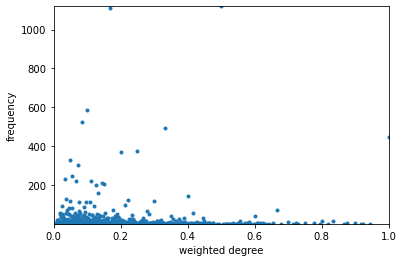

In [13]:
plot_deg_frequency(giant)

0.0022944653632482586
Counter({0.002380952380952381: 302, 0.0021684737281067556: 220, 0.0022086306489976213: 208, 0.002249913464866736: 207, 0.002001668056713928: 201, 0.0021357742181540807: 200, 0.0022522522522522522: 200, 0.0019656019656019656: 198, 0.002335279399499583: 197, 0.00215633423180593: 197, 0.0024229837313949464: 196, 0.0025284450063211127: 196, 0.002328830926874709: 193, 0.002457002457002457: 192, 0.0021160289190618937: 191, 0.002293202293202293: 191, 0.0020387359836901123: 187, 0.0021294021294021295: 185, 0.0022923646623170518: 185, 0.0020768431983385254: 185, 0.002413127413127413: 184, 0.0025484199796126403: 183, 0.0022488755622188904: 179, 0.0024687004055722094: 179, 0.0019305019305019305: 178, 0.002197802197802198: 177, 0.0020543615676359038: 176, 0.0020913770913770914: 176, 0.0022123893805309734: 176, 0.002014652014652015: 175, 0.002370417193426043: 173, 0.001976639712488769: 172, 0.0020940415000951836: 172, 0.0018018018018018018: 172, 0.0025020850708924102: 171, 0.0

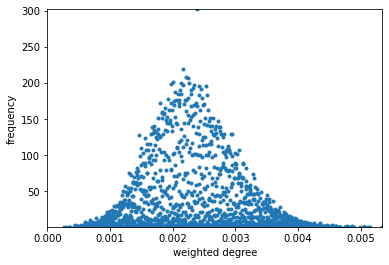

In [14]:
n = giant.number_of_nodes()
m = giant.number_of_edges()

p = ( 2*float(m) ) / ( n* (n-1) )
print(p)
G_er = nx.erdos_renyi_graph(n, p)
plot_deg_frequency(G_er)

Klasterizacija je jako izrazena sto se moze videti i sa grafika



### 11 - Da. Mreza iskazuje osobine malog sveta. To se moze zakljuciti na osnovu visoke klasterizacije i prosecne duzine puta

### 12 -  asortativna analiza


In [9]:
r_in = nx.degree_assortativity_coefficient(giant, "in", "in")
print(r_in)



-0.0728668921889202


In [10]:
r_out = nx.degree_assortativity_coefficient(giant, "out", "out")
print(r_out)

-0.028439202745470463


In [14]:

def plot_deg_corr_in(g, xscale = "linear", yscale = "linear"):
    first = []
    second = []
    for i, k in g.edges():
        first.append(g.in_degree(i))
        first.append(g.in_degree(k))
        second.append(g.in_degree(k))
        second.append(g.in_degree(i))

    plt.figure(1)   

    plt.xlabel('degree')                                                                                                             
    plt.xscale(xscale)                                                                                                                
    plt.xlim(1, max(first)) 

    plt.ylabel('degree')                                                                                                          
    plt.yscale(yscale)                                                                                                                
    plt.ylim(1, max(second))                                                                                                             

    plt.scatter(first, second, marker='.')                                                                                                    
    plt.show()
    
def plot_deg_corr_out(g, xscale = "linear", yscale = "linear"):
    first = []
    second = []
    for i, k in g.edges():
        first.append(g.out_degree(i))
        first.append(g.out_degree(k))
        second.append(g.out_degree(k))
        second.append(g.out_degree(i))

    plt.figure(1)   

    plt.xlabel('degree')                                                                                                             
    plt.xscale(xscale)                                                                                                                
    plt.xlim(1, max(first)) 

    plt.ylabel('degree')                                                                                                          
    plt.yscale(yscale)                                                                                                                
    plt.ylim(1, max(second))                                                                                                             

    plt.scatter(first, second, marker='.')                                                                                                    
    plt.show()



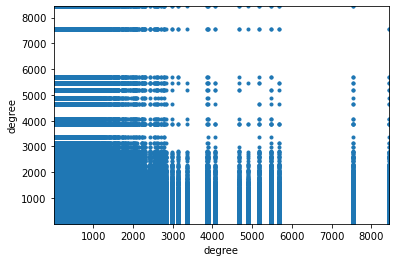

In [12]:
plot_deg_corr_in(giant)


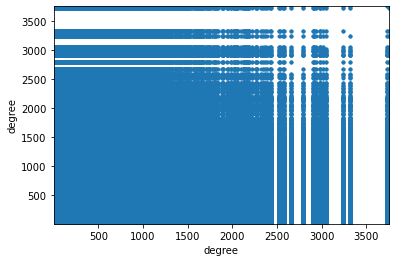

In [15]:
plot_deg_corr_out(giant)

### 13 - Klub bogatih


In [27]:
d = []
for _, x in giant.degree():
    d.append(x)

GH = nx.havel_hakimi_graph(d)
print("Asortativnost SNET: ", r_in , "---Asortativnost Hakimi: ", nx.degree_assortativity_coefficient(GH))

Asortativnost SNET:  -0.0728668921889202 ---Asortativnost Hakimi:  0.11913101780721992


### 14 - Power Law


In [20]:
from collections import Counter
from operator import itemgetter

def plot_deg_frequency(G, d = False, xscale = "log", yscale = "log"):

    if d =='in':
        degrees = G.in_degree()
    else:
        degrees = G.out_degree()
        
    _, deg_list = zip(*degrees)
    deg_counts = Counter(deg_list)        
    x, y = zip(*deg_counts.items())                                                      

    plt.figure(1)   

    # prep axes                                                                                                              
    plt.xscale(xscale)                                                                                                                
    plt.xlim(1, max(x))  

    plt.ylabel('frequency')                                                                                                          
    plt.yscale(yscale)                                                                                                                
    plt.ylim(1, max(y))                                                                                                             
                                                                                                                                                                                                    
    plt.scatter(x, y, marker='.')                                                                                                    
    plt.show()

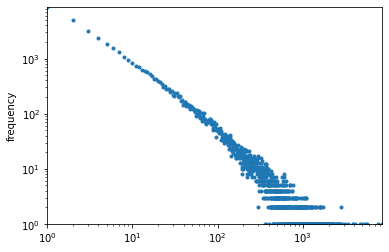

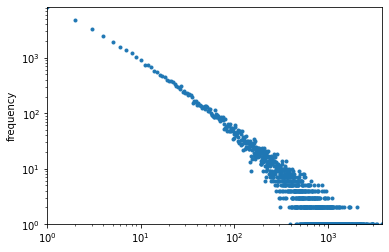

In [21]:
plot_deg_frequency(giant, 'in')
plot_deg_frequency(giant, 'out')

In [22]:
import powerlaw
degree_sequence_in = sorted([d for n, d in giant.in_degree()], reverse=True)
results = powerlaw.Fit(degree_sequence_in)
results.supported_distributions

R, p = results.distribution_compare('power_law', 'exponential')
print(f"Loglikelihood ratio: {R}")
print(f"Statistical significance: {p}")
R, p = results.distribution_compare('power_law', 'truncated_power_law')
print(f"Loglikelihood ratio: {R}")
print(f"Statistical significance: {p}")


degree_sequence_out = sorted([d for n, d in giant.out_degree()], reverse=True)
results_out = powerlaw.Fit(degree_sequence_out)




Calculating best minimal value for power law fit
Loglikelihood ratio: 18.10495286217585
Statistical significance: 0.046470633180489676


Assuming nested distributions


Loglikelihood ratio: -0.3979699421297864
Statistical significance: 0.37231005648716164
Calculating best minimal value for power law fit


In [23]:

R, p = results_out.distribution_compare('power_law', 'exponential')
print(f"Loglikelihood ratio: {R}")
print(f"Statistical significance: {p}")
R, p = results_out.distribution_compare('power_law', 'truncated_power_law')
print(f"Loglikelihood ratio: {R}")
print(f"Statistical significance: {p}")

Loglikelihood ratio: -3.93916381605473
Statistical significance: 0.39313322569096876
Loglikelihood ratio: -6.6417511931911175
Statistical significance: 0.00026775182783378426


Assuming nested distributions


Pošto je p-value za prvi slučaj značajno manje od 0.05, power law mnogo bolje fituje od eksponencijalne raspodele

### 15 -  Habovi i autoriteti

In [24]:
h, a = nx.hits(giant)

h = sorted([(i, k) for k, i in h.items()], reverse=True)[0:10]
hub_ecc  = []
for i, k in h:
    hub_ecc.append((i,k,nx.eccentricity(giant, k)))
print("Habovi")
hub_ecc

C:\Users\Nikola\anaconda3\lib\site-packages\networkx\algorithms\link_analysis\hits_alg.py:78: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G, nodelist=list(G), dtype=float)


Habovi


[(0.004142390078236127, 'malcontent', 7),
 (0.0037892870220104877, 'matts2', 6),
 (0.0032252999329525126, 'NoMoreNicksLeft', 6),
 (0.001956621671769481, 'glengyron', 7),
 (0.0018982860521713789, 'aletoledo', 6),
 (0.0018293492270988936, 'eleitl', 7),
 (0.0018236989937602845, 'randomb0y', 7),
 (0.001792135288307546, 'alllie', 6),
 (0.0016892182299702205, 'cartooncorpse', 7),
 (0.0016878758595461182, 'sakebomb69', 7)]

In [25]:
a = sorted([(i, k) for k, i in a.items()], reverse=True)[0:10]
a_ecc  = []
for i, k in a:
    a_ecc.append((i,k,nx.eccentricity(giant, k)))
print("Autoriteti")
a_ecc

Autoriteti


[(0.006663363285109734, 'qgyh2', 7),
 (0.006566949036854427, 'rmuser', 7),
 (0.004418411623287881, 'matts2', 6),
 (0.004336247344774118, 'malcontent', 7),
 (0.004291053704824784, 'alllie', 6),
 (0.00307557489635341, 'noname99', 7),
 (0.0030139709020781946, 'NoMoreNicksLeft', 6),
 (0.0029954146576625785, 'maxwellhill', 7),
 (0.0029049737728818084, 'georgewashingtonblog', 7),
 (0.0028399348710246367, 'twolf1', 7)]

Rasporedjeni su u jezgru mreze

### 16 - centralnosti

In [17]:
def calculate_centralities(G):

    IDC_dict = nx.in_degree_centrality(G)
    ODC_dict = nx.out_degree_centrality(G)
    BC_dict = nx.betweenness_centrality(G, k=100)

    df1 = pd.DataFrame.from_dict(IDC_dict, orient='index', columns=['IDC'])
    df2 = pd.DataFrame.from_dict(ODC_dict, orient='index', columns=['ODC'])
    df3 = pd.DataFrame.from_dict(BC_dict, orient='index', columns=['BC'])
    df = pd.concat([df1, df2, df3], axis=1)
    return df

In [18]:
data_cent = calculate_centralities(giant)

In [19]:
df_bc = pd.DataFrame({'BC':data_cent['BC']})

df_bc.nlargest(5, 'BC')

,BC
qgyh2,0.023024
rmuser,0.020605
7oby,0.019297
Poromenos,0.015586
alllie,0.013103


### Po Ulaznom Stepenu

In [20]:
df_cc = pd.DataFrame({'IDC':data_cent['IDC']})

df_cc.nlargest(5, 'IDC')

,IDC
rmuser,0.173893
qgyh2,0.155688
noname99,0.117008
alllie,0.112843
swampsparrow,0.106823


### Po Izlaznom Stepenu

In [21]:
df_dc = pd.DataFrame({'ODC':data_cent['ODC']})
df_dc.nlargest(5, 'ODC')

,ODC
NoMoreNicksLeft,0.077256
mexicodoug,0.076823
7oby,0.068390
h0dg3s,0.066782
randomb0y,0.062823


### Relaciona

In [22]:
bc = pd.DataFrame({'BC':data_cent['BC']})
bc.nlargest(5, 'BC')

,BC
qgyh2,0.023024
rmuser,0.020605
7oby,0.019297
Poromenos,0.015586
alllie,0.013103


### 17 - Po Sopstvenom vekotru

Ne racuna se za usmerenu mrezu

### 18 - Katz-ova skala

Nije moguce alocirati 23GB prostora za izracunavanje :)

In [23]:
KatzC_dict = nx.katz_centrality(giant, alpha=5e-4, beta=1.0, max_iter=1000, tol=1e-06, nstart=None, normalized=True, weight='weight')
df_ikc = pd.DataFrame.from_dict(KatzC_dict, orient='index', columns=['IKC'])
print(df_ikc.nlargest(10, 'IKC'))

KatzC_dict = nx.katz_centrality(giant.reverse(), alpha=5e-4, beta=1.0, max_iter=1000, tol=1e-06, nstart=None, normalized=True, weight='weight')
df_okc = pd.DataFrame.from_dict(KatzC_dict, orient='index', columns=['OKC'])
print(df_okc.nlargest(10, 'OKC'))

                      IKC
rmuser           0.081090
qgyh2            0.080126
alllie           0.051158
gst              0.045419
noname99         0.044487
malcontent       0.039211
maxwellhill      0.037558
matts2           0.037079
NoMoreNicksLeft  0.035129
twolf1           0.034963
                       OKC
malcontent        0.052426
matts2            0.049337
NoMoreNicksLeft   0.043850
mexicodoug        0.030195
aletoledo         0.029722
7oby              0.028942
glengyron         0.028006
redditcensoredme  0.027895
otakucode         0.026564
nixonrichard      0.025293


### 19 - kompozitni rank

In [24]:

labele = ['IDC', 'ODC', 'BC', 'IKC', 'OKC']
data_helper = pd.concat([data_cent , df_ikc, df_okc ] , axis = 1)
df_ = data_helper
for metric in labele:
    df_[f"{metric}_rank"] = df_[f"{metric}"].rank(ascending=False) 
    
df_['composite_rank'] = df_['IDC'] * df_['ODC'] * df_['BC_rank'] * df_['IKC'] * df_['OKC']
df_.nlargest(10, 'composite_rank')
#df_.sort_values(['CC'], ascending = False, inplace=True)

,IDC,ODC,BC,IKC,OKC,IDC_rank,ODC_rank,BC_rank,IKC_rank,OKC_rank,composite_rank
malcontent,0.042968,0.060597,0.005432,0.039211,0.052426,39.0,9.0,80.0,6.0,1.0,0.000428
matts2,0.037855,0.059958,0.004402,0.037079,0.049337,57.0,11.0,94.0,8.0,2.0,0.000390
otakucode,0.046865,0.059978,0.004617,0.023298,0.026564,29.0,10.0,88.0,18.0,9.0,0.000153
deuteros,0.054391,0.052226,0.003748,0.021795,0.021596,19.0,17.0,106.0,21.0,19.0,0.000142
glengyron,0.029711,0.043978,0.002883,0.019990,0.028006,115.0,36.0,127.0,26.0,7.0,0.000093
NoMoreNicksLeft,0.055751,0.077256,0.010669,0.035129,0.043850,18.0,1.0,13.0,9.0,3.0,0.000086
redditcensoredme,0.029401,0.042515,0.003504,0.020397,0.027895,117.0,40.0,112.0,23.0,8.0,0.000080
mutatron,0.042638,0.061421,0.006379,0.017898,0.022365,40.0,7.0,71.0,33.0,15.0,0.000074
randomb0y,0.045690,0.062823,0.007109,0.017636,0.023113,34.0,5.0,60.0,36.0,14.0,0.000070
jordanlund,0.045958,0.047917,0.002877,0.015652,0.015793,32.0,24.0,128.0,50.0,54.0,0.000070


### 20 - Spektarna analiza

Usmerene mreze ne pdrzavaju spektarnu analizu

### 21 - Luvenska metoda

![alt text](images/user_net_1.0.png "Bipartitivna mreža i unimodalne projekcije")

Slika: Luvenska metoda. Rezolucija 1.0. Broj komuna 41

![alt text](images/user_net_2.0.png "Bipartitivna mreža i unimodalne projekcije")

Slika: Luvenska metoda. Rezolucija 2.0. Broj komuna 27

![alt text](images/user_net_0.5.png "Bipartitivna mreža i unimodalne projekcije")

Slika: Luvenska metoda. Rezolucija 0.5. Broj komuna 143

### 23 - Mostovi


Nema metode za izracunavanje. Relaciona centralnost nam moze reci koji cvorovi bi mogli biti mostovi